In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import cv2

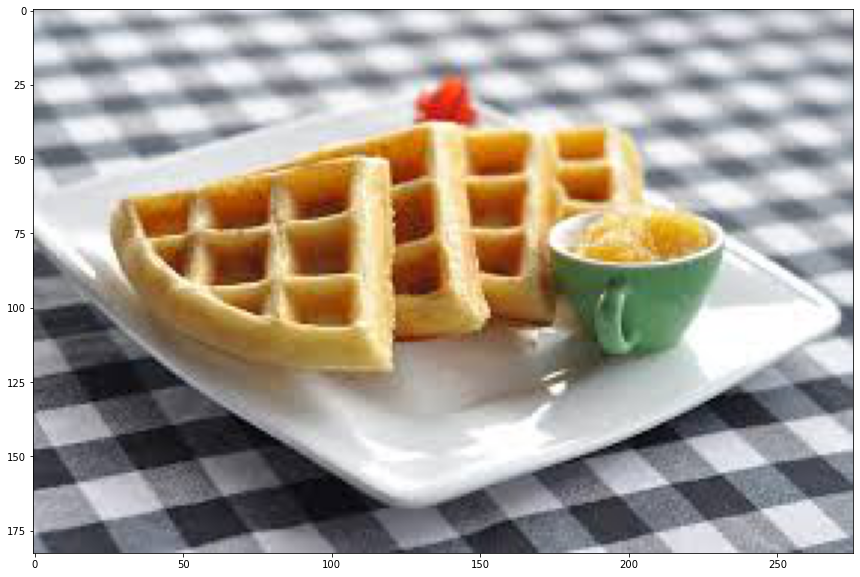

In [2]:
# load in color image for face detection
image = cv2.imread('waffle.jpg')

# convert to RBG
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(20,10))
plt.imshow(image)

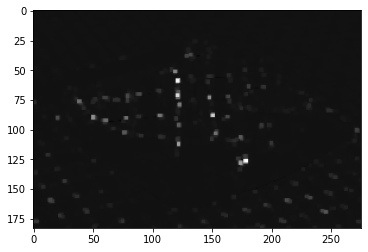

In [13]:
image_copy = np.copy(image)
gray = cv2.cvtColor(image_copy,cv2.COLOR_RGB2GRAY)

gray = np.float32(gray)
#parameters are float image , window size , sobel operators size,constant
dst = cv2.cornerHarris(gray,2,3,0.02)
dst = cv2.dilate(dst , None)#increases white region 
plt.imshow(dst , cmap='gray')

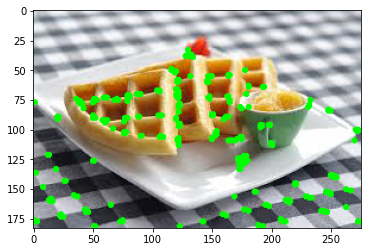

In [14]:
# Define a threshold for extracting strong corners
# This value varies depending on the image and how many corners you want to detect
# Try changing this free parameter, 0.1, to be larger or smaller and see what happens
thresh = 0.05*dst.max()

# Create an image copy to draw corners on
corner_image = np.copy(image_copy)

# Iterate through all the corners and draw them on the image (if they pass the threshold)
for j in range(0, dst.shape[0]):
    for i in range(0, dst.shape[1]):
        if(dst[j,i] > thresh):
            # image, center pt, radius, color, thickness
            cv2.circle( corner_image, (i, j), 1, (0,255,0), 1)

plt.imshow(corner_image)